# Lesson 6: Plotting and Arrays

You have now seen the basic Python language (*"syntax"*) and programming methods.  
These basic building blocks can be built-up to construct advanced programs for things such as:
* solving the equations for engineering problems;
* simulating the behaviour of constructions and other designs;
* optimising structures, energy flows or other problems;
* analysing data from measurements in order to present the results.

For the last item you will need some extra tools, including how to plot your results in high-quality figures and how to load your data from files and save the results.

In this section we will learn how to plot professional quality figures and save them for use in reports and presentations.  
This section covers 2D plotting in this section but 3D can be seen in the supplementary notes.

## General advice on working through these notes:

New functions new methods of manipulating data will be introduced as they are needed.
* **Keep a file or notebook** to make a note of the most useful functions and methods for you to look up when you need them, as it is impossible to remember everything.
* For things you use less frequently **look them up on the internet** or in the manuals by searching for what you want to do and the keywords "Python" or "Matplotlib" along with any other snippets you remember. 
    * Most programmers consult the online guides frequently.

## Importing Modules and Accessing Attributes

In order to manipulate numerical data effectively we need to use a new data type called a numerical `array`.  
These can be used more mathematically than lists and behave a little differently.  

Arrays and plotting functions are imported from external libraries, in the same way we have already seen for the `math` and `numpy` libraries.

### Matplotlib

Matplotlib, and particularly its plotting capabilities in `pyplot`, are used to create publication quality figures of functions and data. The functionality is vast, and you will need to refer to the documentation frequently until you are familiar with what you need from it and the details of how it is used:  
https://matplotlib.org/stable/tutorials/introductory/usage.html.   
Most of the functionality we will be using are contained in the `pyplot` functionality of Matplotlib, which is normally accessed using:

In [1]:
import matplotlib.pyplot as plt

The various plotting tools and ways of specifying figure attributes are then accessed using the syntax:
```python
plt.ATTRIBUTE(ARGUMENTS)

```

## The Basics of Plotting

In its simplest terms the `plot()` function in `pyplot` takes a list of $x$ values and plots each one on the $x-$axis against a  corresponding $y-$value from a list of $y$ values of the same length.

This is demonstrated for the squares of $x=[1,2,3,4]$ below:

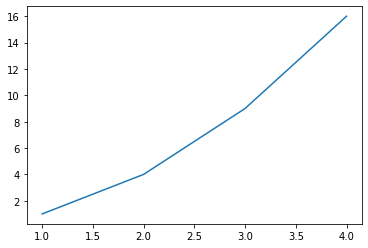

In [2]:
import matplotlib.pyplot as plt

xvals = [1, 2, 3, 4]
yvals = [1, 4, 9, 16]

plt.plot(xvals, yvals)

plt.show()

**However:** there are two main methods of plotting figures, so the online documentation can sometimes be confusing at first.  

[See the guide here](https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html) for the alternative way of making figures as used above. Although this may seem simpler at first (and looks like other languages such as MATLAB) the method used below is more flexible and ["object oriented"](https://en.wikipedia.org/wiki/Object-oriented_programming).

### Creating a Figure

The [`plt.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots) function returns two things: a **fig**ure _canvas_ to construct a figure on, and a set of _**ax**es_ to draw specific plots on.
* The `fig` object has `.ATTRIBUTES` for changing things such as the figure title, axis labels and decorations
* The `ax` object has `.ATTRIBUTES` such as functions for specific plot types etc.

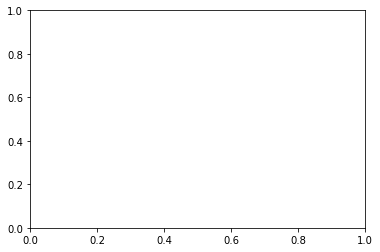

In [3]:
fig, ax = plt.subplots()

Once you have some axes (on a figure) you can start drawing things directly on them.

### Example: Square Wave

To plot a "square wave" that switches between the values $y=+1,-1,+1,-1,\dots$ every $\pi$ radians:

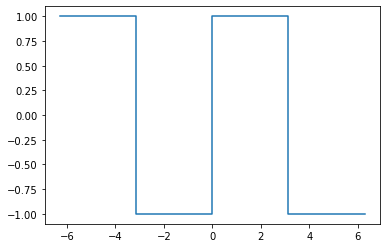

In [4]:
import matplotlib.pyplot as plt

# create a single set of axes on a figure
fig, ax = plt.subplots()

pi=3.14
xvals = [-2*pi, -pi, -pi, 0, 0, pi, pi, 2*pi]
yvals = [    1,   1,  -1,-1, 1,  1, -1,   -1]

ax.plot(xvals, yvals)

plt.show()

### Multiple axes on the same plot

The possible arguments to `plt.subplots()` are given in the documentation here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots

```python
matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, 
                  sharey=False, squeeze=True, subplot_kw=None, 
                  gridspec_kw=None, **fig_kw)
```

Of particular interest are the number of rows `nrows` and columns `ncols` of axes on the figure.  
If you don't specify there will only be a single set of axes as above, but if you give two values as arguments they stand for the number of rows and number of columns.  
The `ax` object will then be a `[list]` of axes or a set of axes, depending on how you unpack the returned values:

### Try out the following examples below to see what they do

#### Two rows (one column by default) and the variable ax contains a list of two axes ax[0] and ax[1]
```python
fig, ax = plt.subplots(2)
```


#### a 2x2 grid of axes using the variable `axs` for multiple Axes: axs = [axs[0], axs[1], axs[2], axs[3]]
```python
fig, axs = plt.subplots(2, 2)
```

#### Each axis has its own variable name, for multiple Axes, here ax1 and ax2
```python
fig, (ax1, ax2) = plt.subplots(1, 2)
```

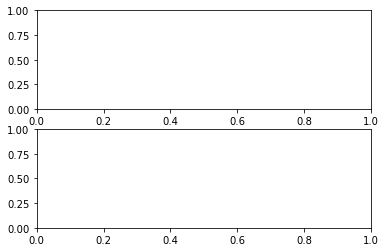

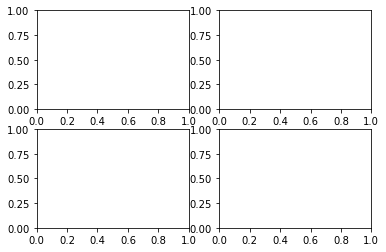

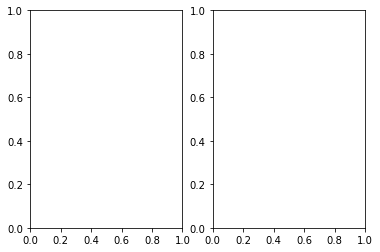

In [5]:
### BEGIN SOLUTION
#### using the variable ax for a pair of Axes
fig, ax = plt.subplots(2)


#### using the variable axs for a 2 by 2 grid of Axes
fig, axs = plt.subplots(2, 2)

#### using tuple unpacking for multiple Axes
fig, (ax1, ax2) = plt.subplots(1, 2)
### END SOLUTION

## Numpy and Numerical Arrays

Lists are useful but it can be fiddly to perform mathematical operations for each element, e.g.::

```python 
b = [3*sin(x)**2+10 for x in a]
```

Also multiplying a list by a number is interpreted as adding the list to itself that number of times:

```python
alist = [1, 2, 3]
print(alist+alist)
print(alist*3)
```
> ```[1, 2, 3, 1, 2, 3]
[1, 2, 3, 1, 2, 3, 1, 2, 3]```


Another data type can be imported with the Numerical Python (NumPy) module that behave in a more mathematically logical way.  

### Numpy

NumPy is a Python library that provides efficient operation on arrays of data.  
NumPy stores data in what are called *numerical arrays*, along with many functions for generating and methods for manipulating them.

It is usually imported using the alias `np`:
```python
import numpy as np
```
You can then get help by using the `help(MODULE.THING)` command, for example type:
```python
help(np.random)
```
To see the help manual on the `random` functions in NumPy.  

### Converting Lists to Arrays

An array *looks* like a `list` but it is a NumPy N-Dimensional Array (in this case 1D).  

NumPy arrays have element-by-element (_elementwise_) operations, which is more logical mathematically:

In [6]:
import numpy as np

alist = [1, 2, 3, 4]
ary = np.array(alist)

print(ary+ary)
print(ary*ary)
print(ary**3)

[2 4 6 8]
[ 1  4  9 16]
[ 1  8 27 64]


Plotting can be done on arrays the same as with lists:

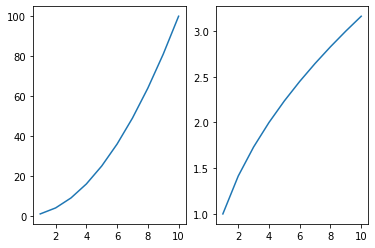

In [7]:
import matplotlib.pyplot as plt
import numpy as np


xvals = np.array([1,2,3,4,5,6,7,8,9,10])
xsquared = xvals**2

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(xvals, xsquared)
ax2.plot(xvals, np.sqrt(xvals))

fig.show()

* NumPy also contains functions that can act directly on all the elements of an array (unlike those in the `math` library`)

### Generating Arrays with `arange()`

NumPy can generate arrays directly using the function `arange()`:

In [8]:
import numpy as np

a = np.arange(1, 8)
print(a)
print(a**2)

[1 2 3 4 5 6 7]
[ 1  4  9 16 25 36 49]


The `arange` function can also use fractional values 

The syntax is `range(VAR1,VAR2,STEP)`, where the  values created are those between `VAR1` and `VAR2`, including `VAR1` but not `VAR2`:

In [9]:
import numpy as np

a = np.arange(-1, 1, 0.5)

print(a)

[-1.  -0.5  0.   0.5]


**Note:** the second  value is not included in the array, so to get around this the value needs to be slightly above the required end-point.

#### Exercise: Create an array that goes from `-2` to `2` in steps of `0.2` and _includes_ the numbers `-2`, `0` and `2`

In [10]:
### BEGIN SOLUTION

ary = np.arange(-2,2.1,0.2)

print(ary)

### END SOLUTION

[-2.0000000e+00 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00
 -1.2000000e+00 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01
 -4.0000000e-01 -2.0000000e-01 -4.4408921e-16  2.0000000e-01
  4.0000000e-01  6.0000000e-01  8.0000000e-01  1.0000000e+00
  1.2000000e+00  1.4000000e+00  1.6000000e+00  1.8000000e+00
  2.0000000e+00]


**Note:** Sometimes the `arange` function returns the values in scientific notation, as above.

This is due to the central value being _very close_ to zero but not quite (due to precision accuracy).

One solution to this is to use the `.round()` function method built in to arrays:

In [11]:
import numpy as np
a = np.arange(-2, 2.1, 0.2)

print(a.round(1))

[-2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2 -0.   0.2  0.4  0.6
  0.8  1.   1.2  1.4  1.6  1.8  2. ]


### Generating Arrays with `linspace()`

The `arange` function is useful when we want an array of numbers with a fixed spacing.
However, in some applications we might want an array that starts and ends at fixed values but has a certain *number* of steps in between.

For this we can use the `linspace` function from NumPy, which stands for *"linear spacing"*.  
Type `help(np.linspace)` to read more about it:

In [12]:
import numpy as np
pi = np.pi

a = np.linspace(-pi, pi, 5)
print(a)

[-3.14159265 -1.57079633  0.          1.57079633  3.14159265]



This has returned 5 values in total, including **both** the start value $-\pi$ and end value $\pi$.  
That is, with `x=linspace(a,b,n)` $a \leq x \leq b$ (unlike with `x=arange(a,b,dx)` where $a \leq x < b$).  

Both `linspace` and the previous `arange` function are very useful when plotting mathematical functions.

## Plotting using Arrays

Arrays can be used to generate the $x$ and $y$ values for plotting against each other, and the maths on arrays makes it much easier to generate $y$ values from an array of $x$ values:

#### Exercise: Create an array of 100 values from $-\pi$ to $\pi$ using `linspace()` for x-values, create a plot with two axes (two rows and one column), one above the other and  plot $\cos(x)$ on the top `ax1` and $\sin(x)$ on the bottom `ax2`:

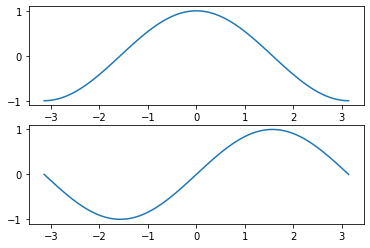

In [13]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi
sin = np.sin
cos = np.cos

#xvals = ???  
#cosx = ???
#sinx = ???
### BEGIN SOLUTION
xvals = np.linspace(-pi,pi,100)  # eleven x-values in total (0 to 10)
cosx = cos(xvals)
sinx = sin(xvals)
### END SOLUTION

#create your plot canvas and pair of axes (ax1, ax2) (see examples further up in the notes)
### BEGIN SOLUTION
fig, (ax1, ax2) = plt.subplots(2,1)
### END SOLUTION

# plot cos(x) on ax1 and sin(x) on ax2
### BEGIN SOLUTION
ax1.plot(xvals, cosx)
ax2.plot(xvals, sinx)
### END SOLUTION

fig.show()

Expected Result: 
![](Figures/ccss.png)


[Click for solution](solutions/sol0601.ipynb)

## Changing the Plotting Attributes

### Plotting Styles

We can change the plotting style (and many other features) using extra arguments to the `subplots` and `plot` functions.  
The plot attributes can be given as keyword arguments after the x-values and y-values.   
The arguments are given as strings and consist of either a symbol to specify a marker or line type or the colour  
(spelled using the American spelling `color`, without a "u"):

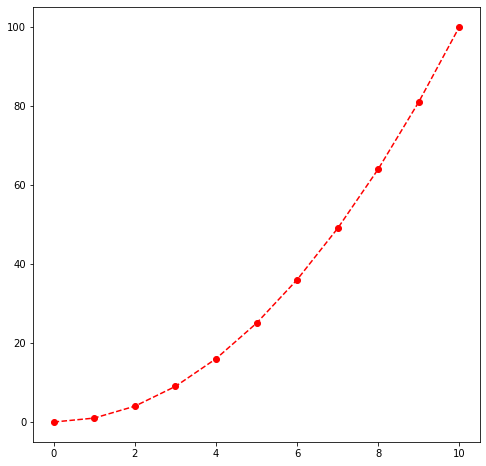

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xvals = np.arange(11)
yvals = xvals**2

# set some x and y dimensions (in inch !!!)
dims = (8,8)
fig, ax = plt.subplots(figsize=dims) # specify the size of the figure

ax.plot(xvals, yvals, linestyle='--', marker='o', color='red')

fig.show()

Use `help(ax.plot)` to see what else is available and experiment with line styles and points etc.  
Also refer to the many online resources for matplotlib as well as the extra cheat-sheet.

In [15]:
help(ax.plot)

Help on method plot in module matplotlib.axes._axes:

plot(*args, scalex=True, scaley=True, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the ap

### Multiple Plots on the same axis

The following example shows that we can plot more than one function on the same graph.
A different colour is automatically used for each function.

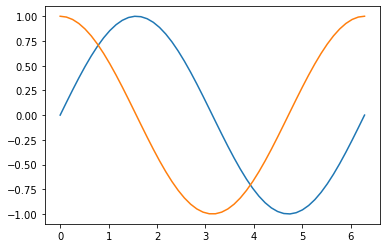

In [2]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

fig, ax = plt.subplots()

xs = np.linspace(0, 2*pi, 50)
ys = np.sin(xs)
zs = np.cos(xs)

ax.plot(xs, ys)
ax.plot(xs, zs)

fig.show()

### Labels and Legends

We next improve the plot by adding labels for the horizontal and vertical axes and we add a legend as well as a title.

* **Add lines between `ax.plot()` and `fig.show()` to include the following functions: `ax.set_xlabel(<TEXT>)`, `ax.set_ylabel(<TEXT>)`, `ax.set_title(<TEXT>)` and `ax.legend()`.**
* The optional keyword argument `size=12` can be used to specify the text size.

The figure should look like the example below the code block.  
Use the `help()` function if you are unsure.

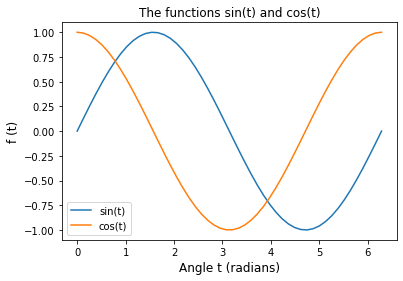

In [3]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi


xs = np.linspace(0, 2*pi, 50)
ys = np.sin(xs)
zs = np.cos(xs)

fig, ax = plt.subplots()

ax.plot(xs, ys, label="sin(t)")
ax.plot(xs, zs, label="cos(t)")

### BEGIN SOLUTION
ax.set_xlabel("Angle t (radians)", size=12)
ax.set_ylabel("f (t)", size=12)
ax.set_title("The functions sin(t) and cos(t)")
ax.legend()
### END SOLUTION

fig.show()

In [18]:
help(ax.set_xlabel)

Help on method set_xlabel in module matplotlib.axes._axes:

set_xlabel(xlabel, fontdict=None, labelpad=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Set the label for the x-axis.
    
    Parameters
    ----------
    xlabel : str
        The label text.
    
    labelpad : scalar, optional, default: None
        Spacing in points from the axes bounding box including ticks
        and tick labels.
    
    Other Parameters
    ----------------
    **kwargs : `.Text` properties
        `.Text` properties control the appearance of the label.
    
    See also
    --------
    text : for information on how override and the optional args work



Expected Result: ![](Figures/examplesins.png)

[Click for solution](solutions/sol0602.ipynb)

Other features can be changed, such as defining the x and y ranges using the function:
```python
ax.set(xlim=(XMIN, XMAX), ylim=(YMIN, YMAX))
``` 
Where `XMIN`, `XMAX`, `YMIN` and `YMAX` are replaced by values.

The position of the legend can also be specified using one of four built-in position numbers or a pair of numbers in brackets for the relative position on the plot. Other options are available such as `"best"`, which can be found in the help manual.

* **Copy the code from above to the cell below and use the `ax.set()` function to limit the range to $0\leq x \leq\pi$ and $0 \leq y \leq 1$**
* Also use the `loc=(XPOS,YPOS)` argument in `legend()` to specify the legend position relative to the axes. (You may need to experiment with some values between 0 and 1)
* Changing the font size can be done individually as above, or for the whole plot using the command `plt.rc('font', size=14)`, which changes the *"resource configuration"* for matplotlib generally.

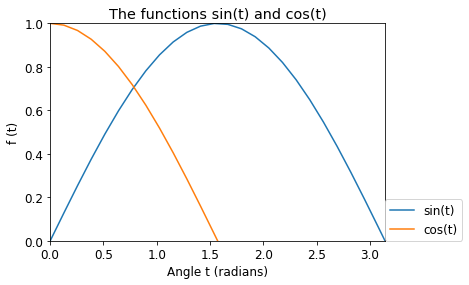

In [4]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi
plt.rc('font', size=12)

### BEGIN SOLUTION
xs = np.linspace(0, 2*pi, 50)
ys = np.sin(xs)
zs = np.cos(xs)

fig, ax = plt.subplots()

ax.plot(xs, ys, label="sin(t)")
ax.plot(xs, zs, label="cos(t)")


ax.set_xlabel("Angle t (radians)")
ax.set_ylabel("f (t)")
ax.set_title("The functions sin(t) and cos(t)")
ax.legend(loc=(1,0))
ax.set(xlim=(0, pi), ylim=(0, 1))
### END SOLUTION

fig.show()

Expected Result: ![](Figures/sinfig2.png)

[Click for model code](solutions/sol0603.ipynb)


# Saving Figures to a File on Your Hard Drive

`fig.savefig('FILENAME.extension')` saves the figure to a file named `FILENAME` with the image format given by the `.extension`: e.g.: `.png` `.jpg` `.pdf` etc.
* note this **must come before** `fig.show()` in your scripts, as `show()` clears the palette and results in a blank figure being saved if it appears above anything.
**DO NOT PUT A `show()` function before any other commands (including `savefig()`) as it blanks the canvas when finished!**

In [5]:
# run the code above (or paste it here) before running this cell

fig.savefig('sinusoids.png')

### Finding your figures on your computer:

The last line in the above shows the function for saving the figure directly to the working folder. It will be saved in whatever folder you are running the Jupyter notebook from.  
Look in the main Jupyterhub browser menu to find the figure (or use a file-browser on your own computer).

You can also specify relative folders (if they exist) such as:
```python
# save in a subfolder called Figures (if it exists):
fig.savefig('Figures/my_figure.png')

# save to the folder *above* the one containing the Notebook:
fig.savefig('../my_figure.png')

# save to a folder **inside** the one above the working folder (if it exists):
fig.savefig('../Pictures/my_figure.png')
```

---


---

## The rest of this section consists of useful practical examples for you to work through and think about.

* There are far too many features to remember them all, so use the online (and other) help as much as possible and keep a note book of the ones you find most useful.


**DO NOT PUT A `show()` function before any other commands (including `savefig()`) as it blanks the canvas when finished!**

## Filled Charts and Plots

The following examples show how to draw filled areas such as pie charts and bar graphs, as well as more complicated things such as approximate areas under curves.

Look at the help and online guides and try to improve the figures and use them for your own data.

### Pie Charts

Look at the code below for plotting a pie chart and also in the other documentation (help files and online). 

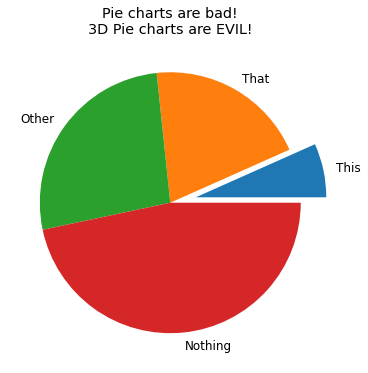

In [6]:
# Pie charts

fig, ax = plt.subplots(figsize=(6, 6))  # make the figure have a square aspect ratio

segs = [1, 3, 4, 7]
explode = [0.2, 0, 0, 0]
labels = ["This", "That", "Other", "Nothing"]

ax.pie(segs, explode, labels)
ax.set_title("Pie charts are bad!\n3D Pie charts are EVIL!")

fig.savefig("LOOK_AT_ME.png") #find this using the browser and open it!
fig.show()

Now see if you can: 
1. Increase the font size; 
2. change the labels to display the percentage of the pie that each segment represents; and 
3. change the colours to yellow, orange, red and purple.

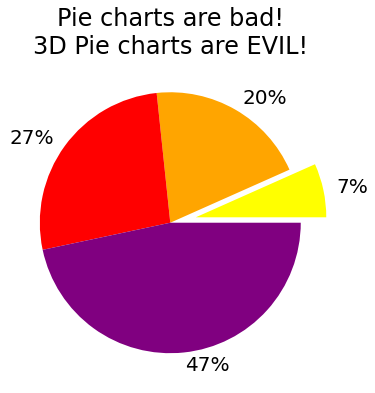

In [48]:
### BEGIN SOLUTION
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', size=20)

fig, ax = plt.subplots(figsize=(6, 6))  # make the figure have a square aspect ratio

segs = np.array([1, 3, 4, 7])
percents = 100*segs/sum(segs)
explode = [0.2, 0, 0, 0]
labels = [f"{p:.0f}%" for p in percents]
colours = ["yellow", "orange", "red", "purple"]

ax.pie(segs, explode, labels, colors=colours)
ax.set_title("Pie charts are bad!\n3D Pie charts are EVIL!")

fig.savefig("LOOK_AT_ME.png") #find this using the browser and open it!
fig.show()
### END SOLUTION

### Bar Plots

Bar charts can be created using `plt.bar(xvals,yvals,OPTIONS)`. 

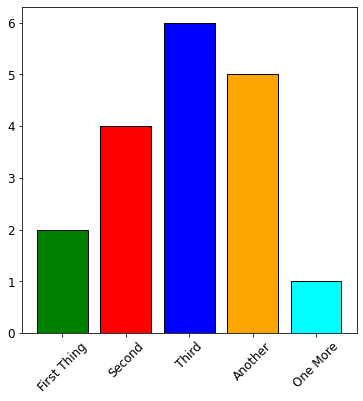

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))

xvals = [1,2,3,4,5]
yvals = [2,4,6,5,1]
labels = ["First Thing", "Second", "Third", "Another", "One More"]
faces = ["green", 'red', 'blue', 'orange', 'cyan']
borders = ["black"]*5 # a list repeating the string "black" five times

ax.bar(xvals, yvals, color=faces, edgecolor=borders)
ax.set_xticks([1,2,3,4,5]) # positions of the x labels and tickmarks
ax.set_xticklabels(labels, rotation=45)

fig.show()

### Exercise: Fill in the following code to produce a bar plot that uses `np.exp(x)` to create $y=e^{-(x^2)}$ as $y$ values:

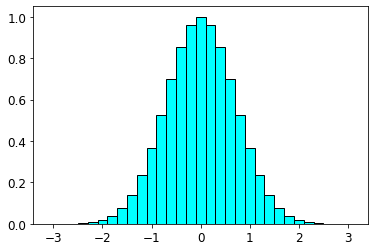

In [23]:
# import what you need
### BEGIN SOLUTION
import numpy as np
import matplotlib.pyplot as plt
### END SOLUTION

#Approximation to area under a cosine function using bars
#import the usual modules

# set dx to 0.2
### BEGIN SOLUTION
dx=0.2
### END SOLUTION
# use arange to generate an array for x values between -3 and 3 pi in steps of dx
### BEGIN SOLUTION
xvals = np.arange(-3, 3+dx, dx)
### END SOLUTION

# let the ys be exp(-xs**2)
### BEGIN SOLUTION
yvals = np.exp(-xvals**2)
### END SOLUTION

# plot a bar plot with the options color='cyan', edgecolor=['black']*len(xvals), width=dx
### BEGIN SOLUTION
fig, ax = plt.subplots()

ax.bar(xvals, yvals, color='cyan', edgecolor=['black']*len(xvals), width=dx)
### END SOLUTION


# show the figure
### BEGIN SOLUTION
fig.show()
### END SOLUTION

Expected output:
![](Figures/output_norm.png)


[Click for solution](solutions/sol0604.ipynb)

# Task 6

A useful thing to do is to define a function that does all the steps of creating a figure template, so you can apply it to lots of different datasets.   
Here you will recreate your own version of the following two-axis figure using the resources listed below. 
* your figure will _not_ be identical as it is using "random" data

![](Figures/task_6_model_example.png)

### RESTART THE KERNEL before starting this exercise

#### Complete the function in the cell below that takes some $x$ and $y$ data and returns a figure object to display or save, then apply the function to some random data and save it.

* The structure is like this:

```python
def plotter(xdata, ydata):
    # 1. your code in a block
    # 2. that creates the figure
    # 3. and edits its properties
    # 4. on both sets of axes
    return fig

##########
# some code to apply ("call") the function 
x,y, = #some data
fig = plotter(x,y)
##########

# 5. save the figure to an image in the same folder 
```

**Submit BOTH a Python `.py` script file *AND* the generated `.png` PNG image file** (NOT A SCREENSHOT and NOT right click "save-as")

### Use the following steps for using the plotting functions and styles: 

1. Import the plotting libraries as `plt`
2. Make a figure canvas with one row and two columns of axes
    * Set the figure with a `figsize` of $10 \times 4$ in
    * your two axes will have different names such as `ax1` and `ax2`, or `ax[0]` and `ax[1]`
3. On the first (left) axes you will need to plot the x-data against the y-data
    * in the `.plot()` function you will also need to specify the following optional (keyword) arguments:
        * set the optional keyword argument `linewidth=0.2` 
        * set the `color=` parameter to `'red'` to adjust the marker colour
        * set the `marker` option to `'*'` and adust the `markersize` parameter to make them bigger
        * the `markerfacecolor` should be green
    * You will need to set the title, x-label and y-label, all with their own `size=??` for the fonts
    * use `<AXNAME>.grid()` to put a grid on the axis, where `<AXNAME>` is replaced with your axes name
    * Set the limits on the x-axis to match the example data ($0:300$)
4. On the second (right hand) axes use the `.hist()` function to plot a *histogram* of **only** the $y-$data
    * Use the `orientation='horizontal'` optional keyword argument to rotate the histogram to align it with the data
    * Other keyword arguments to experiment with are `edgecolor` and `linewidth`
    * Ensure that the figure has all the elements in the example

5. Save the figure using the `.savefig()` function at the end of the script (**not** inside the function).



## Self-help

To find out what any of the functions do, use the `help` function in a new code Cell.  
For example, to learn how to use `random.normal` in NumPy, type:
```python
help(random.normal)
```

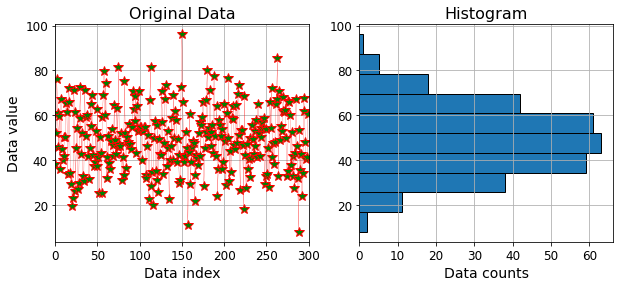

In [7]:
# do NOT change the name of this function
def plotter(xdata, ydata):
    # 1. import the library for plotting
    ### BEGIN SOLUTION
    import matplotlib.pyplot as plt
    ### END SOLUTION
    plt.rc('font', size=12) # leave this in place, it will change all text to 12 point

    # 2., 3., 4. do all the plotting and style elements in the function code block below
    # starting by creating the figure and axes...
    #fig, ??? = ???
    ### BEGIN SOLUTION
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ax1.plot(xdata, ydata, linewidth=0.2, color='red', marker='*', markersize=10, markerfacecolor='green')
    #ax1.plot(xdata, ydata, color='red', marker='*', markerfacecolour='green')
    ax1.set_title('Original Data', size=16)
    ax1.set_xlabel('Data index', size=14)
    ax1.set_ylabel('Data value', size=14)
    ax1.set(xlim=(0, 300))
    ax1.grid()

    ax2.hist(ydata, orientation='horizontal', edgecolor='black')
    ax2.set_title('Histogram', size=16)
    ax2.set_xlabel('Data counts', size=14)
    ax2.grid()
    ### END SOLUTION

    # leave this next line in place to return the main figure object
    return fig

###############################################################################
###############################################################################
# YOU DO **NOT** NEED TO CHANGE THIS BLOCK
# the lines in this area make some random data and give it to your function to plot...
import numpy as np

N = 300
xdata = np.arange(N)
mean = 50; std = 15
ydata = np.random.normal(mean, std, N)
#help(np.random.normal)

#your function MUST return a fig object for the following to work
fig = plotter(xdata, ydata)
###############################################################################
###############################################################################


# 5. save the figure to the working folder as a png image, (1% for doing  this)

### BEGIN SOLUTION
fig.savefig('task6_plot.png')
### END SOLUTION

# => check the saved file looks OK then submit BOTH your task6.py script AND the figure.png to moodle

### Feedback cell:

* Remember to run the cell above **_after_ restarting the KERNEL**, then:
* Run the cell below (from your `AR10366` on Jupyterhub) to get feedback on your plot.
* Note: this is a new and quite complicated checking script:
    * it may not detect every problem;
    * it may throw errors when there is nothing really wrong.
    * Please let me know if this is the case.
    * Use your own judgment on if the plot looks good quality.

Feedback:

Check the figure below looks as it should.
Also check that you have saved an image file to the 
same folder as your are running the notebook or python script

Output:


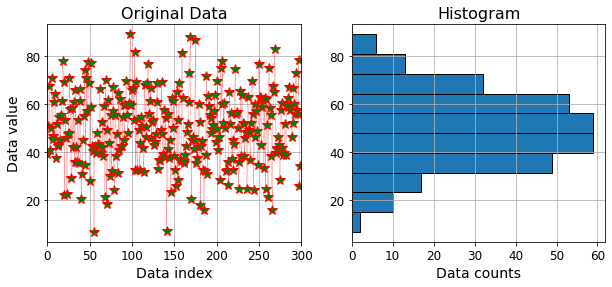

In [8]:
import sys
sys.path.append(".checks")
import check06

try: check06.test(plotter)
except NameError as e: print(str(e)+"\nYou need to run the cell above to define the plotter function")

---
```




```
---
## Further Material: Creating Multiple Plots using Loops

Loops can be used to create multiple plots without having to type each individually.  
This can be useful both when plotting many datasets and also plotting things such as series representations of mathematical functions.

The next example shows the power series that can be used to approximate the function $\sin(x)$:
$$
\sin(x)\approx x - \frac{x^3}{3!} + \frac{x^5}{5!} - \cdots
$$

### Use the following example as a template to help build up the exercises below it.

In [ ]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

xs = np.linspace(-np.pi, np.pi, 50)

# plot the real sine function
ax.plot(xs, np.sin(xs), label='sin(x)', linewidth=3, color='black')

ys = 0  # give an initial value for the ys value here, the arrays in the loop will then be added to zero
p = 1
for i in [1, 2, 3]:
    n = 2*i-1
    ys = ys + p*xs**n / factorial(n) #try printing ys each time to see how they change
    ax.plot(xs, ys, label=f"{n} terms")
    p = -p  # this value alternates between positive and negative

ax.set( xlim=(-np.pi, np.pi), ylim=(-3, 3) )
ax.legend(loc=(0.15, 0.6))


fig.savefig('more_sinusoids.png')

## Exercise: Fourier Series

A *Fourier Sine Series* is an infinite series made up of sine or cosine terms.  
An example is the approximation to a "square wave" that switches between the values $y=+1,-1,+1,-1,\dots$ every $x=n\pi$ ($n=1,2,3,\dots$).

The square wave in **Exercise 1** can be approximated as the Fourier Series:  

$$f(x) \approx a_1\sin(x)+a_3\sin(3x)+a_5\sin(5x)+\cdots,$$

with the coefficients $a_1=1$, $a_3=1/3$, $a_5=1/5$, ... $a_n=1/n^2$.  


### Plotting the component functions

Use the template below to make a script for plotting the individual terms for the series.  
You will expand on this later to plot the resulting series with increasing numbers of terms.

In [ ]:
#import both the NumPy and plotting modules
### BEGIN SOLUTION
import matplotlib.pyplot as plt
import numpy as np
### END SOLUTION

#use linspace to generate a 50 element array between 0 and pi for the x values
### BEGIN SOLUTION
xs = np.linspace(0, np.pi, 50)
### END SOLUTION

# initialise the figure
### BEGIN SOLUTION
fig, ax = plt.subplots()
### END SOLUTION


#use a FOR loop to assign the values 1, 3 and 5 to a variable n
### BEGIN SOLUTION
for n in [1, 3, 5]:
### END SOLUTION
    #define a coefficient a to be the value 1.0/n
    ### BEGIN SOLUTION
    a = 1.0/n
    ### END SOLUTION
    
    #calculate the y values as a*sin(n*xvalues)
    ### BEGIN SOLUTION
    ys = a*np.sin(n*xs)
    ### END SOLUTION
    
    #plot the x-values against the y-values 
    #  - use the following for the label: label=f'1/{n} sin({n}x)')
    #  - (try to break this down to think about how it works)
    ### BEGIN SOLUTION
    ax.plot(xs, ys, label=f'1/{n} sin({n}x)')
    ### END SOLUTION

# create a legend and show the figure
### BEGIN SOLUTION
ax.legend()
fig.show()
### END SOLUTION

Expected Output: ![](Figures/output_62_0.png)

[Click for solution](solutions/sol0605.ipynb)

### Summing the Terms  

We will now sum the terms in the series to see how the function starts to build up.  
Simply copy your code from the problem above into a new code Cell and change the following aspects:


In [ ]:
#import both the NumPy and plotting modules
### BEGIN SOLUTION
import matplotlib.pyplot as plt
import numpy as np
### END SOLUTION

#use linspace to generate a 50 element array between 0 and pi for the x values
### BEGIN SOLUTION
xs = np.linspace(0, np.pi, 50)
### END SOLUTION

# initialise the figure
### BEGIN SOLUTION
fig, ax = plt.subplots()
### END SOLUTION

#before the loop set an initial y-values of zero (see the power-series example)
### BEGIN SOLUTION
ys = 0
### END SOLUTION

#use the line below to set an "empty" label to add information to on each iteration:
lbl=''

#use a FOR loop to assign the values 1, 3 and 5 to a variable n
### BEGIN SOLUTION
for n in [1, 3, 5]:
### END SOLUTION
    # inside the loop...
    #define a coefficient a to be the value 1.0/n
    ### BEGIN SOLUTION
    a = 1.0/n
    ### END SOLUTION
    
    #change the y-value definition to ADD TO the previous value: yvalues=yvalues+a*sin(n*xs)
    ### BEGIN SOLUTION
    ys = ys+a*np.sin(n*xs)
    ### END SOLUTION
    
    #use the line below as it is to define the label 
    lbl = lbl + f"1/{n} sin({n}x)"    
    
    # plot the x-values against the y-values 
    #  - in the plot command set label=lbl
    ### BEGIN SOLUTION
    #add the following line to put a "plus" after each term...
    ax.plot(xs, ys, label=lbl)
    ### END SOLUTION
    
    #add the following line to put a "plus" after each term...
    lbl = lbl + '+' #why do we add the "+" at this point?


    
# set the legend and show the figure
ax.legend(loc=(1.01, 0))
fig.show()

Expected Output: ![](Figures/output_64_0.png)

[Click for solution](solutions/sol0606.ipynb)

### Convergence  

Finally, it's interesting to see how the series will end up after many terms.  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(0, np.pi, 50)
ys = 0
i = 0

for n in range(1, 100, 2):
    i = i+1
    a = 1.0/n
    ys = ys+a*np.sin(n*xs)
    
# move the plot function to OUTSIDE the indented loop code block to only plot the final plot...
plt.plot(xs, ys, label=str(i)+' terms') # using the simplified syntax here

plt.legend(loc='best') # using the simplified plt. syntax here
plt.show() # using the simplified plt. syntax here

## Using loops with subplots

Creating a figure using the function `subplots(NUMROWS, NUMCOLS, *ARGUMENTS)` returns a list of axes:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(-np.pi, np.pi, 50)

fig, ax = plt.subplots(2, 1, figsize=(10,8))  # two rows, one column, start first plot
# ax is a list ax = [ax1, ax2, ax3 ...] accessed using ax[0], ax[1] etc...

# plot to the first set of axes
ax[0].plot(xs, np.sin(xs), color='red', label="sin(x)")

# plot to the second set of axes (bottom row)
ax[1].plot(xs, np.cos(xs), color='blue', label="cos(x)")
ax[1].text(-4, 1.0, "(b)")
ax[1].set_title("Second")
ax[1].legend()

# go back to the first set of axes
ax[0].legend(loc=2)
ax[0].set_title("First")
ax[0].text(-4, 1.0, "(a)")

fig.savefig('subplot1.png')

Loops can be useful to simplify repetition in code:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(-np.pi, np.pi, 50)

funcs = [np.sin, np.cos, np.tan]
cols = ["red", "blue", "green"]
labs = ["sin(x)", "cos(x)", "tan(x)"]
txt = ["(a)", "(b)", "(c)"]

N = len(funcs)

fig, ax = plt.subplots(1, N, figsize=(12,4))  # 1 row, N columns,
# ax is a list ax = [ax1, ax2, ax3 ...] accessed using ax[0], ax[1] etc...

for i in range(N):
    fn = funcs[i]
    # plot to the ith set of axes
    ax[i].plot(xs, fn(xs), color=cols[i], label=labs[i])
    a,b,c,d = ax[i].axis() # extract the axis scaling factors
    ax[i].text(0, d*1.1, txt[i])

fig.legend() # create a legend for the whole figure, not for each axes
fig.show()

You can even do multiple rows and columns, but it starts to get complicated....

* **Note:** that Numpy ND arrays use `array_name[ROWNUM, COLNUM]` to access an element
* But nested lists use `list_name[ROWNUM][COLNUM]`

In [ ]:
from numpy import random as rnd

nrows=3
ncols=2
fig, ax = plt.subplots(nrows, ncols, figsize=(12, 9))
# ax is a 2D array ax = [[ax1, ax2], [ax3 ...], ] accessed using ax[0, 0], ax[0, 1] etc...

#define the marker symbols to use in each plot
ms = [["o", "*"], 
      [">", "<"], 
      [".", "p"]]

# loop though all the axes indices (len(ax)=6)
for i in range(nrows):
    for j in range(ncols):
        # generate lists of 100 randomly drawn floats between 0 and 1
        xdata = rnd.random(100) 
        ydata = rnd.random(100)
        
        aij = ax[i,j]
        aij.plot(xdata, ydata, marker=ms[i][j], linestyle="")
        aij.text(0.4, 0.5, f"{i},{j}", size=50)
        aij.axis([0,1, 0,1]) # another way of scaling the axis dimensions to [xmin, xmax, ymin, ymax]
    
fig.savefig('subplot_from_list.png')